In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(3, kernel_size=(3,3), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 3)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 3)         0         
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 1000)              589000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                        

In [3]:
model.layers

In [4]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(-0.008129315, 0.2248577)

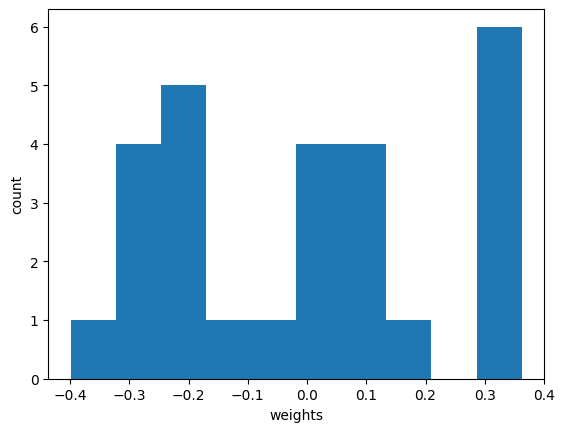

In [5]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

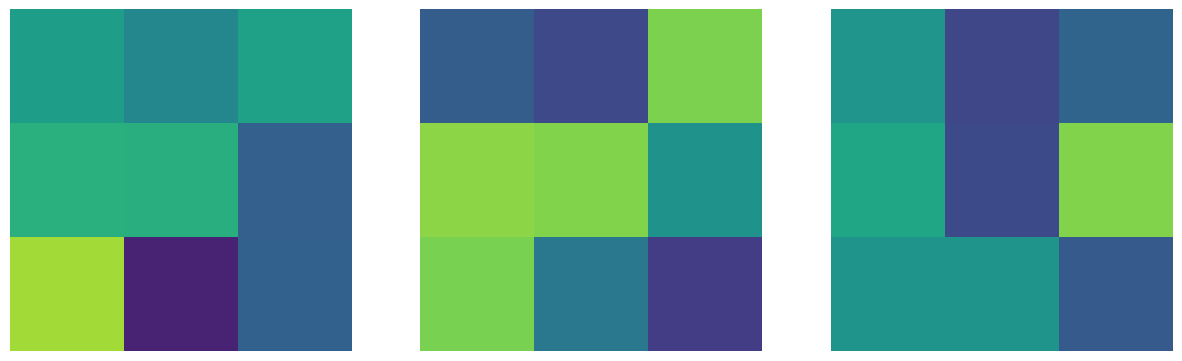

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')
    
plt.show()

In [7]:
%%time 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2607 - accuracy: 0.9184 - val_loss: 0.1041 - val_accuracy: 0.9676
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1194 - accuracy: 0.9623 - val_loss: 0.0777 - val_accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0891 - accuracy: 0.9713 - val_loss: 0.0612 - val_accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0722 - accuracy: 0.9768 - val_loss: 0.0528 - val_accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0517 - val_accuracy: 0.9830
CPU times: total: 5min 35s
Wall time: 1min 16s


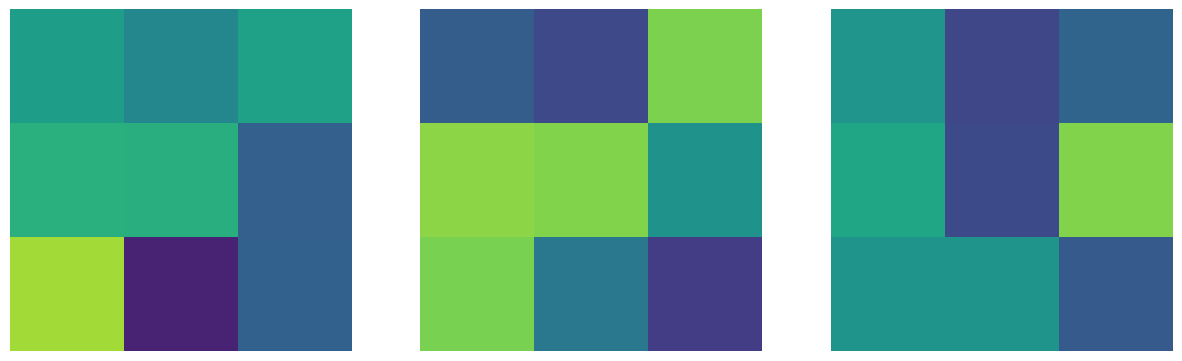

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')
    
plt.show()

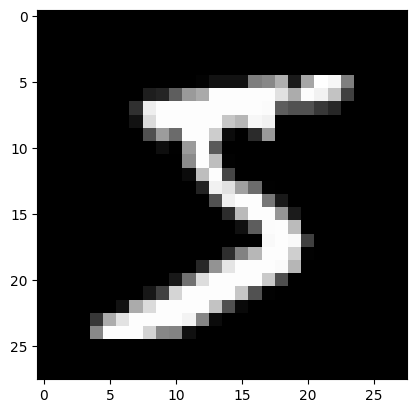

In [9]:
plt.imshow(X_train[0], cmap='gray');

In [10]:
inputs = X_train[0].reshape(-1,28,28,1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)
conv_layer_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [11]:
feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

(1, 28, 28, 3)

In [13]:
feature_maps[0, :, :, 0].shape

(28, 28)

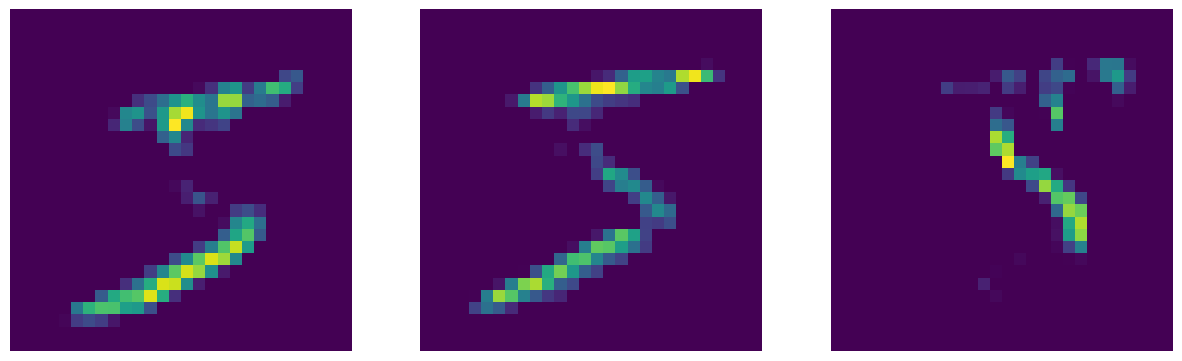

In [16]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].imshow(feature_maps[0, :, :, i])
    ax[i].axis('off')
    
plt.show()

In [17]:
def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1, 4, figsize=(15,5))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1,4):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
        
    plt.show()

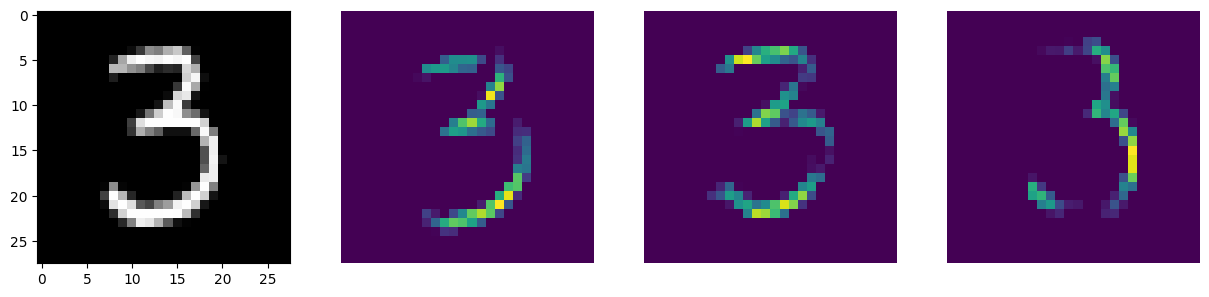

In [18]:
draw_feature_maps(50)

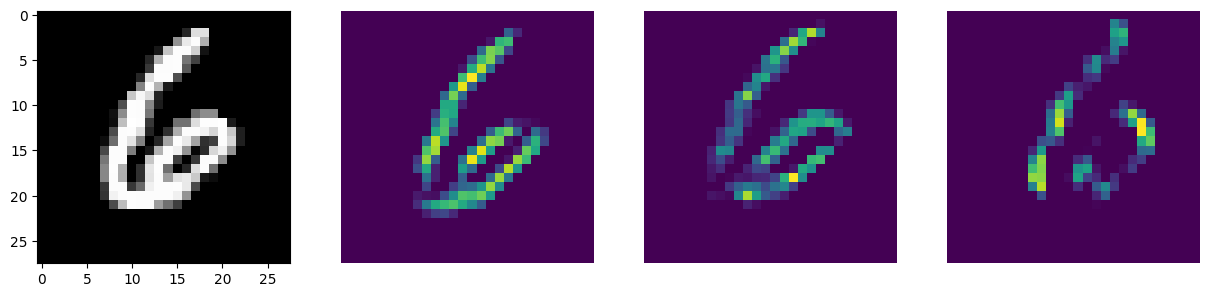

In [19]:
draw_feature_maps(13)

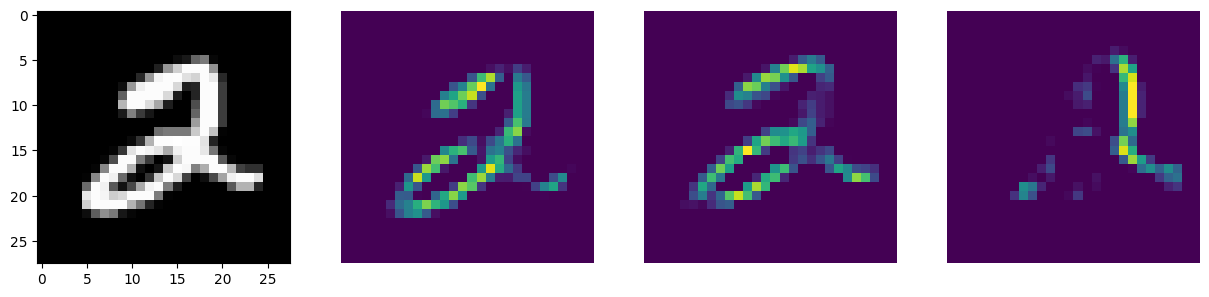

In [20]:
draw_feature_maps(5)

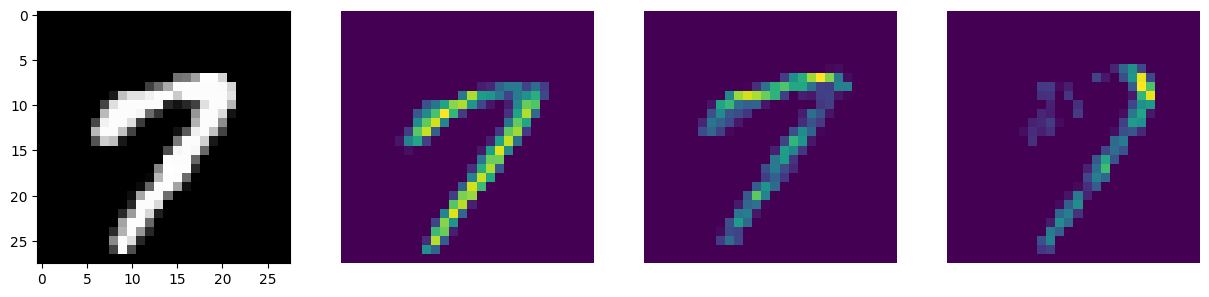

In [21]:
draw_feature_maps(15)

-----------------------

In [22]:
model1 = models.Sequential([
    layers.Conv2D(8, kernel_size=(3,3), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
%%time 
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model1.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1679 - accuracy: 0.9480 - val_loss: 0.0675 - val_accuracy: 0.9777
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0556 - val_accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0501 - accuracy: 0.9837 - val_loss: 0.0445 - val_accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0421 - val_accuracy: 0.9866
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0443 - val_accuracy: 0.9860
CPU times: total: 12min 20s
Wall time: 2min 19s


In [27]:
conv_layer_output = tf.keras.Model(model1.input, model1.layers[0].output)

def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1, 9, figsize=(15,5))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1, 9):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
        
    plt.show()

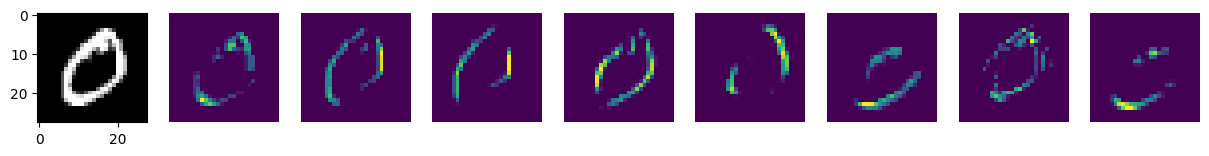

In [28]:
draw_feature_maps(1)

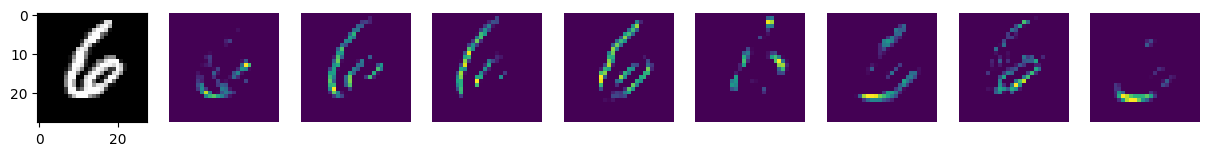

In [29]:
draw_feature_maps(13)

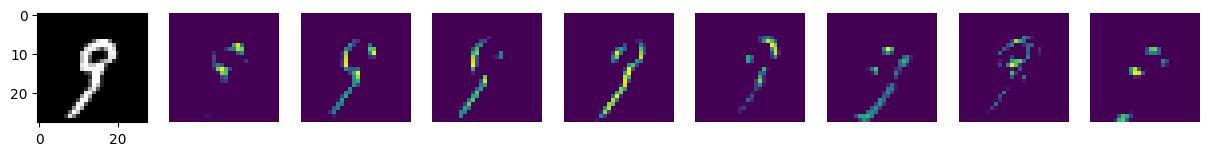

In [30]:
draw_feature_maps(19)

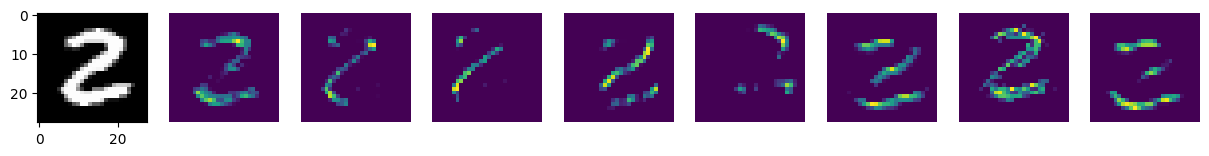

In [31]:
draw_feature_maps(25)